In [7]:
import tensorflow as tf
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
my_data = pd.read_csv('runeva.csv')
my_data.head()

,treadmill level,HR,respiration,intensity
0,1.0,86,4,1
1,1.0,86,4,1
2,1.0,94,10,1
3,1.0,94,10,1
4,1.0,100,7,1


In [10]:
print(my_data.dtypes)

treadmill level    float64
HR                   int64
respiration          int64
intensity            int64
dtype: object


In [11]:
print(my_data.describe())

       treadmill level           HR  respiration    intensity
count      1272.000000  1272.000000  1272.000000  1272.000000
mean          2.471698   109.988208    11.385220     1.970912
std           0.704990    10.042742     2.363711     0.723835
min           1.000000    24.000000     0.000000     1.000000
25%           2.000000   105.000000    10.000000     1.000000
50%           2.400000   111.000000    12.000000     2.000000
75%           3.000000   116.000000    13.000000     2.000000
max           3.800000   126.000000    16.000000     3.000000


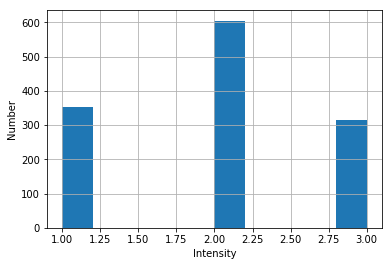

In [12]:
my_data['intensity'].hist()
plt.ylabel('Number')
plt.xlabel('Intensity')
plt.show()

In [18]:
data = my_data.loc[:,['treadmill level','HR','respiration']]
label = my_data.loc[:,'intensity']

In [19]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels=train_test_split(data,label,random_state=0,test_size=0.2)

In [20]:
print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

(1017, 3) (255, 3) (1017,) (255,)


In [24]:
from sklearn.metrics import accuracy_score
k_range = range(1, 51)
k_scores =[]
for K in k_range:
    clf=KNeighborsClassifier(n_neighbors = K)
    clf.fit(train_data,train_labels)
    print('K=', K)
    predictions=clf.predict(test_data)
    score = accuracy_score(test_labels,predictions)
    print(score)
    k_scores.append(score)

K= 1
0.9294117647058824
K= 2
0.8823529411764706
K= 3
0.8666666666666667
K= 4
0.8588235294117647
K= 5
0.8705882352941177
K= 6
0.8588235294117647
K= 7
0.8549019607843137
K= 8
0.8509803921568627
K= 9
0.8666666666666667
K= 10
0.8509803921568627
K= 11
0.8588235294117647
K= 12
0.8509803921568627
K= 13
0.8588235294117647
K= 14
0.8588235294117647
K= 15
0.8666666666666667
K= 16
0.8666666666666667
K= 17
0.8627450980392157
K= 18
0.8627450980392157
K= 19
0.8666666666666667
K= 20
0.8666666666666667
K= 21
0.8705882352941177
K= 22
0.8705882352941177
K= 23
0.8745098039215686
K= 24
0.8705882352941177
K= 25
0.8705882352941177
K= 26
0.8705882352941177
K= 27
0.8705882352941177
K= 28
0.8627450980392157
K= 29
0.8666666666666667
K= 30
0.8666666666666667
K= 31
0.8627450980392157
K= 32
0.8549019607843137
K= 33
0.8549019607843137
K= 34
0.8470588235294118
K= 35
0.8509803921568627
K= 36
0.8470588235294118
K= 37
0.8470588235294118
K= 38
0.8470588235294118
K= 39
0.8470588235294118
K= 40
0.8509803921568627
K= 41
0.8

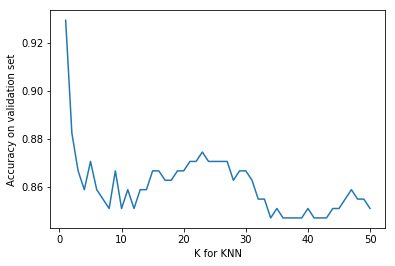

[37 36 35 33 40 41 42 38 49 34 43 44 39 11  9  7  6 47 32 45 31 48  3 46
  5 12 13 10 27 30 17 16 28 29 18 15  2 14  8 19 24 25 23 21 20  4 26 22
  1  0]


In [25]:
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Accuracy on validation set')
plt.show()
print(np.array(k_scores).argsort())

In [27]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(data,label)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')